In [1]:
# Load the software ("import the module" in python jargon)

from fermi_school_like import *

# Import matplotlib for plotting
from matplotlib import pyplot as plt

# This show the plots inline in the notebook

%matplotlib inline

In [2]:
# Define number of bins in our data

n_bins = 100

# Generate number of bins in x

xs = np.linspace(1,100,n_bins)

# Print them

print(xs)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]


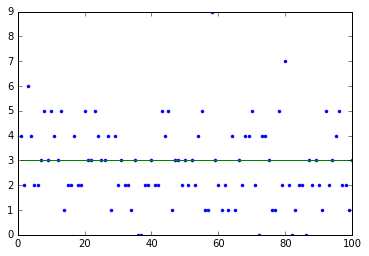

In [3]:
# Create a generative model (just a simple line ax + b)
# Define its coefficients

a_true = 3.0

true_signal = Constant(a_true)

# Use it as generative process

data_generative_process = DataGenerativeProcess(true_signal)

# generate some data. For each bin generate a random number from a Poisson distribution
# with the average given by the model

data = data_generative_process.generate(xs)

# Let's plot the data

plt.plot(xs, data,'.')

# Plot also the generative model
plt.plot(xs, true_signal(xs))

In [4]:
# Prepare a likelihood analysis 

# First we need to assume a model. In this case we know that it
# must be a line. Let's start from values close but not quite
# like the true value (which in a real analysis we wouldn't know)

a = 2.5
model = Constant(a)

# Then we need to decide a noise model
noise_model = 'Poisson'

# Now we can create a Likelihood analysis

like = Likelihood(xs, data, model, noise_model)

In [5]:
# Find the Maximum Likelihood Estimate for our parameters:

a_mle = like.maximize()

# Print the MLE estimate. It should be close enough (but not exact. why?)

print((a_mle))

[ 2.79000007]


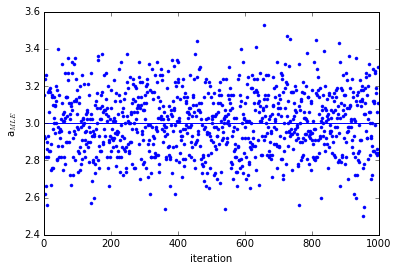

In [6]:
# Now repeat the whole analysis (from data generation on) a certain number of times

# I prepared a convenience function to do that. Let's do it 1000 times

many_a_mle, = like.generate_and_fit(data_generative_process, 1000)

# Now let's plot for example the maximum estimates for a

plt.plot(many_a_mle,'.')
plt.ylabel(r"a$_{MLE}$")
plt.xlabel("iteration")

# Plot the true value
plt.axhline(a_true)

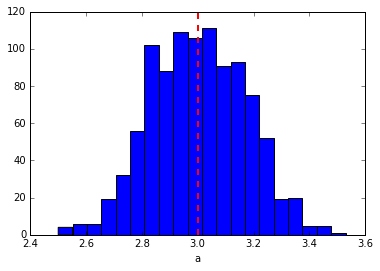

In [7]:
# We can make an histogram of the MLE estimates
histogram = plt.hist(many_a_mle, 20)
plt.xlabel("a")
# plot the vertical like of the true value
plt.axvline(a_true, color='red', lw=2, linestyle='--', zorder=100)

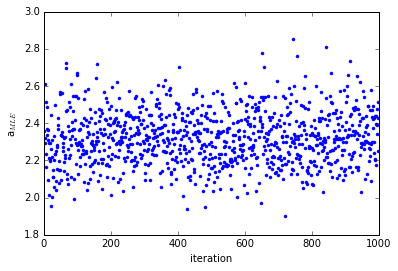

In [8]:
# So MLE is unbiased!

# If you want an example of a biased estimator, let's use chi square
# in this case
like.noise_model = 'gaussian'

many_a_mle_chi, = like.generate_and_fit(data_generative_process, 1000)

# Now let's plot for example the maximum estimates for a

plt.plot(many_a_mle_chi,'.')
plt.ylabel(r"a$_{MLE}$")
plt.xlabel("iteration")

# Plot the true value
plt.axhline(a_true)

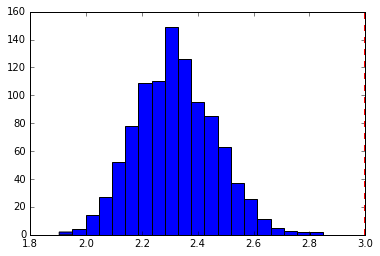

In [9]:
histogram = plt.hist(many_a_mle_chi, 20)

# plot the vertical like of the true value
plt.axvline(a_true, color='red', lw=2, linestyle='--', zorder=100)

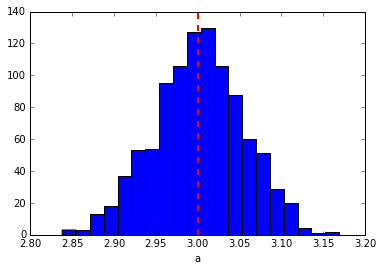

In [10]:
# Now let's generate the same model but with many more bins

n_bins = 1000

# Generate number of bins in x

xs = np.linspace(1,1000,n_bins)

data = data_generative_process.generate(xs)

like = Likelihood(xs, data, model, 'poisson')

many_a_mle2, = like.generate_and_fit(data_generative_process, 1000)

# We can make an histogram of the MLE estimates
histogram = plt.hist(many_a_mle2, 20)
plt.xlabel("a")
# plot the vertical like of the true value
plt.axvline(a_true, color='red', lw=2, linestyle='--', zorder=100)

(-10, 5)

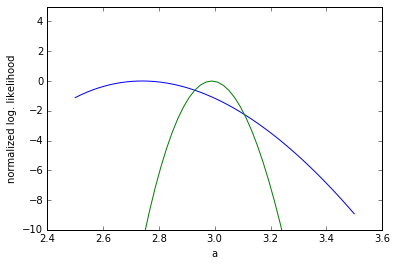

In [24]:
# Let's look at the likelihood profile for one case and the other

a_s = np.linspace(2.5,3.5)

# Small quantity of data

n_bins1 = 100

xs1 = np.linspace(1,100,n_bins1)

data1 = data_generative_process.generate(xs1)

like1 = Likelihood(xs1, data1, model, 'poisson')
like1.maximize()

profile1 = like1.profile(a_s)

# Large quantity of data

n_bins2 = 1000

xs2 = np.linspace(1,1000,n_bins2)

data2 = data_generative_process.generate(xs2)

like2 = Likelihood(xs2, data2, model, 'poisson')
like2.maximize()

profile2 = like2.profile(a_s)

plt.plot(a_s, profile1 - profile1.max(), label='Few data')
plt.plot(a_s, profile2 - profile2.max(), label='Many data')
plt.xlabel("a")
plt.ylabel("normalized log. likelihood")
plt.ylim([-10,5])